# EDA 기초

지난 시간에는 PCA와 같은 몇몇 시각화 툴과 더불어 그래프의 용례에 대해 살펴보았습니다.

오늘은 본격적으로 시각화를 해보는 시간을 갖도록 할텐데요,

그 전에 지난 시간에 빠진 부분에 대해 살펴보고 넘어가도록 하겠습니다.

[[링크]](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

PCA에 대해 더 자세히 알고 싶으신 분은 아래 링크를 참조하시기 바랍니다.

[[링크]](https://pca4ds.github.io/)

## Unit 7. 시각화

Fundamental 9~11과 아래 링크를 참조해 진행해주세요

[Matplotlib](https://wikidocs.net/book/5011)

오늘 데이터는 Fund 5의 과제로 나온 데이터입니다. 데이터에 대한 자세한 설명은 아래 링크를 참조해주세요.

[Kaggle](https://www.kaggle.com/c/bike-sharing-demand/data)

### 조별과제 1

조별로 힘을 합쳐 아래 노트북을 완성해주세요!

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
train = pd.read_csv('./bike_sharing_demand_train.csv')
test = pd.read_csv('./bike_sharing_demand_test.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


### Step 1. 타입 변경

**Fundamental 5. 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?** 를 참조하여 datetime 컬럼의 데이터타입을 변경해주세요.



In [70]:
# to_datetime
# index 15:00
# index workingday
# index count

tr_df = train.copy()
tr_df["datetime"] = pd.to_datetime(tr_df["datetime"])
tr_df["hour"] = tr_df["datetime"].dt.hour
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


In [30]:
answer = np.sum(tr_df[(tr_df["workingday"] == 1) & (tr_df["hour"] == 15)]["count"])
print(answer)

61773


### Step 2. 결측치 탐색

데이터를 살펴보다보면 datetime 컬럼에 info()만으로 발견할 수 없었던 결측치가 있을 것입니다.

그러한 결측치가 있다면 어떻게 채워넣을지 토의해보고 구현해봅시다.

In [71]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


In [72]:
tr_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
dtype: int64

In [75]:
tr_df["datetime"].unique()

array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ...,
       '2012-12-19T21:00:00.000000000', '2012-12-19T22:00:00.000000000',
       '2012-12-19T23:00:00.000000000'], dtype='datetime64[ns]')

In [78]:
for i in tr_df["datetime"].dt.year.unique():
    print(i)

2011
2012


In [125]:
tr_df.head()

,datetime,season,holiday,weekend,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,shift
0,2011-01-01 00:00:00,1,0,1,0,1,9.84,14.395,81,0.0,3,13,16,0,dawn
1,2011-01-01 01:00:00,1,0,1,0,1,9.02,13.635,80,0.0,8,32,40,1,dawn
2,2011-01-01 02:00:00,1,0,1,0,1,9.02,13.635,80,0.0,5,27,32,2,dawn
3,2011-01-01 03:00:00,1,0,1,0,1,9.84,14.395,75,0.0,3,10,13,3,dawn
4,2011-01-01 04:00:00,1,0,1,0,1,9.84,14.395,75,0.0,0,1,1,4,dawn


In [124]:
# 1. index 찾아야합니다. 빠져있는
# 2. 앞 뒤로 평균을 사용합니다... 특정 컬럼만..
# 3. 그리고 holiday, weekend, workingday 인지..
# 4. 계절은 구간을 정해서 설정
# 5. casual, registered, count = 0

tr_df.groupby(by = 'hour').agg('count')["count"]

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: count, dtype: int64

In [136]:
li = []
for i in range(1, len(train)):
    
    if tr_df['hour'][i-1] == 23:
        if tr_df['hour'][i-1] - 23 != tr_df['hour'][i]: # 0이 아니면
            li.append(i) # 추가
            
    elif tr_df['hour'][i-1] + 1 != tr_df['hour'][i]: #
        li.append(i)
        
    
            
print(len(li))


42


In [187]:
dic = {}
for i in range(1, len(train)):
    if tr_df['hour'][i-1] == 23:
        if tr_df['hour'][i-1] - 23 != tr_df['hour'][i]:
            dic[i] = tr_df['hour'][i] - tr_df['hour'][i-1]-1
    elif tr_df['hour'][i-1] + 1 != tr_df['hour'][i]:
        dic[i] = tr_df['hour'][i] - tr_df['hour'][i-1]-1

print(dic)


{29: 1, 49: 2, 72: 1, 95: 1, 118: 1, 141: 1, 236: 2, 258: 2, 305: 1, 396: -12, 411: 1, 435: 1, 482: 1, 505: 1, 624: 1, 646: 1, 669: 2, 717: 1, 762: 1, 784: 1, 1002: 1, 1022: 1, 1094: 2, 1117: 1, 1162: 1, 1187: 1, 1209: 1, 1231: 1, 1280: 1, 1566: 1, 3723: 1, 3771: 1, 3867: 1, 4490: 1, 5449: 1, 5640: 1, 5807: 1, 5998: 1, 6572: 1, 6812: 1, 7028: 1, 10146: 1}


In [188]:
ind = []
flag = 0 

for i, val in enumerate(tr_df['hour']):
    if flag%24 == val:
        flag += 1
        pass
    else: 
        ind.append(i)
        flag+=2
        
print(ind)
len(ind)


[29, 49, 50, 72, 95, 118, 141, 236, 237, 258, 259, 305, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 411, 435, 482, 505, 624, 646, 669, 670, 717, 762, 784, 1002, 1022, 1094, 1095, 1117, 1162, 1187, 1209, 1231, 1280, 1566, 3723, 3771, 3867, 4490, 5449, 5640, 5807, 5998, 6572, 6812, 7028, 10146]


58

### Step 3. 데이터 생성

데이터의 세부 정보를 확인하면 holiday와 workingday가 아래와 같이 서술되어있습니다.

holiday: whether the day is considered a holiday

workingday: whether the day is neither a weekend nor holiday

정작 그런데 정작 weekend 데이터 컬럼은 없군요?

이게 없어도 되는지, 혹은 있어야 좋을지 토론을 해본 후 필요하다고 생각되면 weekend 컬럼을 생성해주세요. 만일 필요가 없다면 생략해도 됩니다.

혹은 기타 다른 데이터를 생성하고 싶다면 이번 step에서 생성해주세요.

In [90]:
# holiday == 0 workingday == 0
tr_df["weekend"] = (tr_df["holiday"] == 0) & (tr_df["workingday"] == 0) 

In [96]:
tr_df["weekend"] = tr_df["weekend"].astype(np.int64)

In [106]:
lis = ['datetime', 'season', 'holiday','weekend','workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour']
tr_df = tr_df[lis]
tr_df.head()

,datetime,season,holiday,weekend,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,1,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,1,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,1,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,1,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,1,0,1,9.84,14.395,75,0.0,0,1,1,4


### Step 4. 시각화를 통한 EDA

본 풀잎에서는 다루지 않았지만(노드에서는 등장) binning 역시 DS에서 상당히 많이 사용되는 스킬 중 하나입니다. 아래 링크를 통해서 binning의 역할에 대해서 함께 살펴봅시다.

[링크](https://m.blog.naver.com/gksshdk8003/221517070898)

 Step 4는 다시 돌아올 예정입니다. 아래 두가지 과제를 한 뒤 넘어가기 바랍니다. 다시 돌아왔다면 원하는 대로 시각화와 EDA를 진행해보시기 바랍니다.
 
 1. datetime을 원하는대로 binning하고(새벽,오전,오후,밤 / 일일 / 주 등...) binning의 효과를 잘 보여줄 수 있는 그래프를 선택해 그려주세요.

In [109]:
def div(x):
    if x <= 5:
        return "dawn"
    
    elif x <= 11:
        return "morning"
    elif x <= 17:
        return "afternoon"
    else:
        return "night"

In [111]:
# 새벽: 00:00 ~ 05:00  dawn
# 오전: 06:00 ~ 11:00  morning
# 오후: 12:00 ~ 17:00  afternoon
# 밤: 18:00 ~ 23:00  night

tr_df["shift"] = tr_df["hour"].apply(div) 
tr_df.head()

,datetime,season,holiday,weekend,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,shift
0,2011-01-01 00:00:00,1,0,1,0,1,9.84,14.395,81,0.0,3,13,16,0,dawn
1,2011-01-01 01:00:00,1,0,1,0,1,9.02,13.635,80,0.0,8,32,40,1,dawn
2,2011-01-01 02:00:00,1,0,1,0,1,9.02,13.635,80,0.0,5,27,32,2,dawn
3,2011-01-01 03:00:00,1,0,1,0,1,9.84,14.395,75,0.0,3,10,13,3,dawn
4,2011-01-01 04:00:00,1,0,1,0,1,9.84,14.395,75,0.0,0,1,1,4,dawn


In [117]:
li = ["dawn", "morning", "afternoon", "night"]
cnt = []
for name in li:
    cnt.append(tr_df[tr_df["shift"]  == name]["count"].sum())

In [118]:
cnt

[67577, 573160, 819512, 625227]

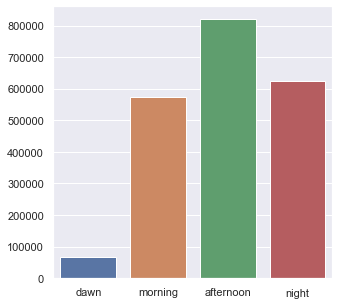

In [121]:
plt.figure(figsize = (5,5))
sns.barplot(x = tr_df["shift"].unique(), y = cnt)
plt.show()

  2. temp, humidity, windspeed를 각각 축으로 삼는 산점도(혹은 저 중 두개를 두 축으로 삼는 산점도)를 그리고 표기되는 데이터(점)의 크기는 count의 크기를 반영하도록 만드시오.

In [155]:
tr_df["count"]

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

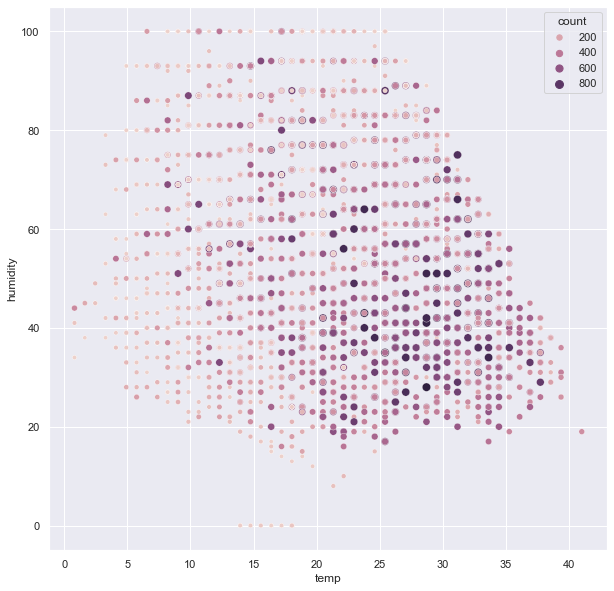

In [160]:
import warnings

warnings.filterwarnings(action='ignore')

        
plt.figure(figsize = (10,10))

# plt.subplots(131)
sns.scatterplot(tr_df["temp"], tr_df["humidity"], hue = tr_df["count"] , size = tr_df["count"])

plt.show()

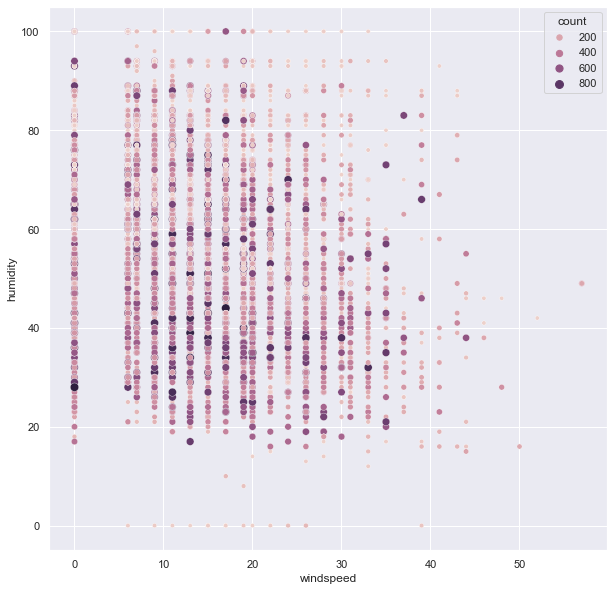

In [161]:
plt.figure(figsize = (10,10))
# plt.subplots(132)
sns.scatterplot(tr_df["windspeed"], tr_df["humidity"], hue = tr_df["count"], size = tr_df["count"])
plt.show()


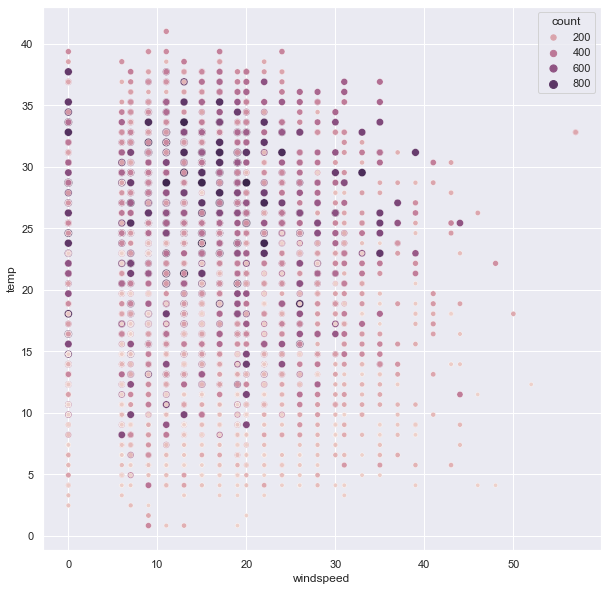

In [162]:
plt.figure(figsize = (10,10))
# plt.subplots(133)
sns.scatterplot(tr_df["windspeed"], tr_df["temp"], hue = tr_df["count"], size = tr_df["count"])
plt.show()

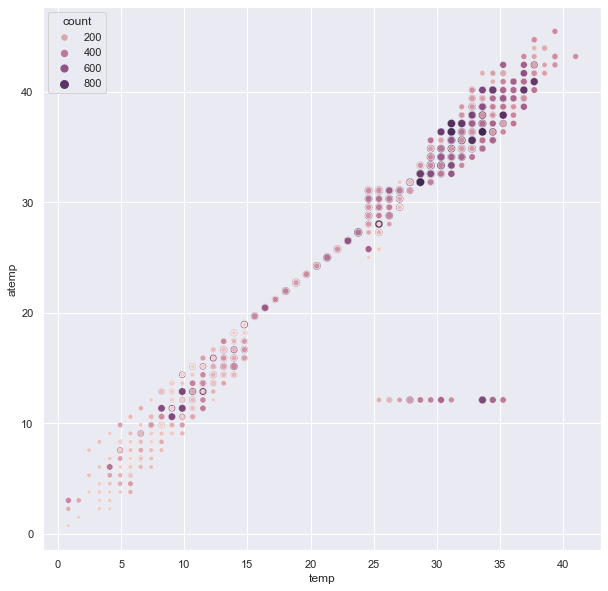

In [163]:
# 체감온도
plt.figure(figsize = (10,10))
# plt.subplots(133)
sns.scatterplot(tr_df["temp"], tr_df["atemp"], hue = tr_df["count"], size = tr_df["count"])
plt.show()

# Step 5. 예측하기

충분히 EDA가 진행되었다면 bike_sharing_demand_train.csv 에서 적당한 데이터를 선별하여 X로 두고 y는 count 컬럼으로 삼아 예측하고 bike_sharing_demand_test.csv 에 count 컬럼을 생성하여 채워넣어봅시다.

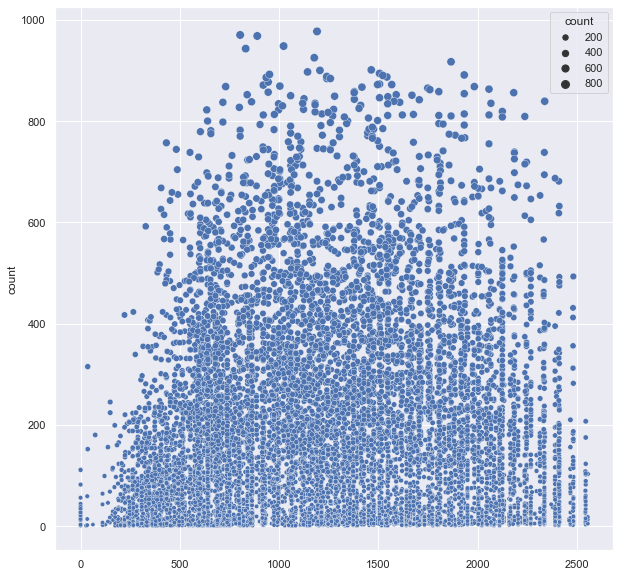

In [172]:
# 체감온도
plt.figure(figsize = (10,10))
# plt.subplots(133)
sns.scatterplot(tr_df["temp"] * tr_df["humidity"],tr_df["count"], size =tr_df["count"])
plt.show()

In [ ]:
# 모델 사용해봐라
# datetime 고정으로 제거
# 1. 나머지 다

# 2. hour만 제거

# 3. shift만 제거

# 4. 평일 중 출퇴근 시간만 구분

# 5. temp * humidity

tr_df = pd.get_dummies(data = tr_df, columns= ["shift"])

In [181]:
tr_df.drop(["datetime", "casual","registered"], axis = 1,inplace=True)
tr_df.drop(["count"], axis = 1,inplace=True)
tr_df.head()

,season,holiday,weekend,workingday,weather,temp,atemp,humidity,windspeed,hour,shift_afternoon,shift_dawn,shift_morning,shift_night
0,1,0,1,0,1,9.84,14.395,81,0.0,0,0,1,0,0
1,1,0,1,0,1,9.02,13.635,80,0.0,1,0,1,0,0
2,1,0,1,0,1,9.02,13.635,80,0.0,2,0,1,0,0
3,1,0,1,0,1,9.84,14.395,75,0.0,3,0,1,0,0
4,1,0,1,0,1,9.84,14.395,75,0.0,4,0,1,0,0


In [183]:
y # count(label) 

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [185]:
ts_df = test.copy()
ts_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


어떤 결과가 나왔나요?

Step 4로 돌아가 EDA를 진행하며 찾아낸 적절한 컬럼을 골라 성능을 개선시켜봅시다.

### Step 6. (보너스) 성능 개선

어쩌면 casual와 registered는 각기 다른 요소의 영향을 받을지도 모르겠습니다. casual와 registered를 따로 예측하고 그 합산이 count가 되도록 Step 5를 반복해주세요.

혹은 [casual, registered, count]라는 벡터를 예측하는 것도 재밌을 겁니다.

In [ ]:
# <YOUR CODE>